In [1]:
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ims_path = "full_processed/extracted_data/"
dat_path = "test_data/"

In [3]:
folders = os.listdir(dat_path)
folders.sort(key=int)

In [4]:
files = []
for filename in os.listdir(ims_path):
    if filename.endswith(".npz"):
        im_file = os.path.join(ims_path, filename)
        files.append(im_file)

In [5]:
def extract_num_from_npy_string(string):
    numbers = re.findall("[0-9]+", string[-9:])
    numbers = int(numbers[0])
    return numbers

In [6]:
fnames = sorted(files, key=extract_num_from_npy_string)

In [7]:
# format is cropped image, interpolated line, interpolation points, curvature, and crop points!
# cropped_images = []
# interpolated_lines = []
# interpolation_points = []
# curvatures = []
# height_length_ratios = []

# # populate the arrays
# for f in fnames:
#     arr = np.load(f)
#     cropped_images.append(arr["arr_0"])
#     interpolated_lines.append(arr["arr_1"])
#     interpolation_points.append(arr["arr_2"])
#     curvatures.append(arr["arr_3"])
#     height_length_ratios.append(arr["arr_4"][0])

In [8]:
# format is cropped image, interpolated line, interpolation points, curvature, and crop points!
interpolation_points = []

# populate the arrays
for f in folders:
    arr = np.load("test_data/" + f + "/arr.npz")
    interpolation_points.append(arr["arr_0"])

In [9]:
stacked_points = np.hstack(interpolation_points)
stacked_points.sort()

In [ ]:
inte_points = np.linspace(stacked_points.min(), stacked_points.max(), 1000)

In [19]:
stacked_points

array([ 0.        ,  0.        ,  0.        , ..., 64.31306828,
       64.34483988, 64.96932408])

In [20]:
curve_preds = []
for fold in folders:
    with open(f"test_data/" + fold + "/interpolator.pkl", "rb") as f:
        spl_loaded = pickle.load(f)
        curve_pred = spl_loaded(inte_points)
        curve_preds.append(curve_pred)
curve_mat = np.vstack(curve_preds)

## First create the tuples

In [21]:
# n_ims = len(interpolation_points)
# frms_list = []
# for i in range(n_ims):
#     frmi = list(zip(interpolation_points[i], curvatures[i]))
#     frms_list.append(frmi)

In [22]:
# def deal_with_zero_dup(tup_list: list, arr_idx: int, n_ims: int) -> list:
#     """
#     Drop the tuples which duplicate zero starting elements

#     Just gets rid of duplicates in the list and makes interpolation easier.
#     In general this is a dirty method but it's better than nothing.
#     """
#     zero_start_list = [i for i in tup_list if i[0] == 0.0]
#     tup_list = tup_list[n_ims:]  # ignore the first n_ims things
#     tup = zero_start_list[arr_idx]
#     tup_list.insert(0, tup)
#     return tup_list

## Here is where the padding is done

In [23]:
# zeros_list = np.zeros(100) #zero curvature going in the other interpolation points
# #zeros_list.fill(np.nan)
# padded_frames = []
# for i in range(n_ims):
#     frmi = frms_list[i]
#     idxs = list(np.linspace(0, n_ims - 1, n_ims, dtype=int))
#     idxs.remove(i)
#     for idx in idxs:
#         zipped = list(zip(interpolation_points[idx], zeros_list))
#         frmi.extend(zipped)
#     frmi.sort(key=lambda el: el[0])
#     #frmi = deal_with_zero_dup(frmi, i, n_ims)
#     padded_frames.append(frmi)

In [24]:
# ext_curvatures = []
# for lst in padded_frames:
#     ext_curve = [tup[1] for tup in lst]
#     ext_curvatures.append(ext_curve)
# curve_mat = np.vstack(ext_curvatures)

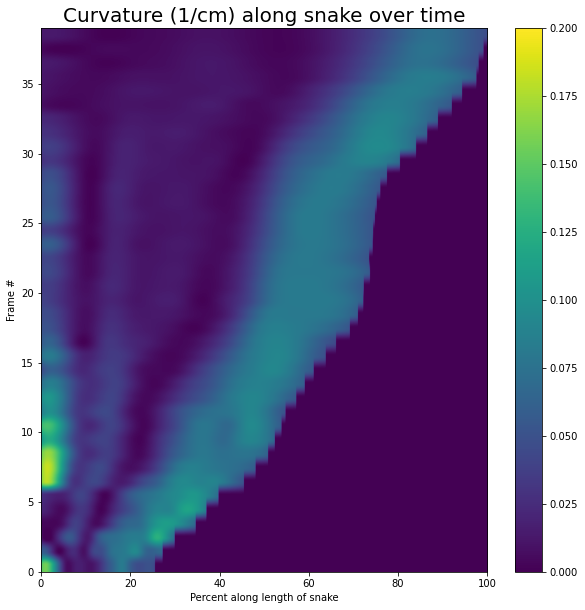

In [28]:
plt.figure(figsize=(10, 10))
skip = 12
skppd = curve_mat[skip:]
plt.imshow(
    skppd,
    interpolation=None,
    cmap="viridis",
    aspect="auto",
    origin="lower",
    extent=[0, 100, 0, skppd.shape[0]],
)
plt.clim(vmin=0, vmax=0.2)
plt.colorbar()
plt.xlabel("Percent along length of snake")
plt.ylabel("Frame #")
plt.title("Curvature (1/cm) along snake over time", fontsize=20)
# plt.show()
plt.savefig("new_kymograph.png")

In [29]:
os.listdir()

['.DS_Store',
 'extraction.ipynb',
 'reaching_num.txt',
 'test_data',
 'trimmed.mov',
 'full_ims.tif (blue).tif',
 '50_bi26_05_L_cal08.mp4',
 '.ipynb_checkpoints',
 'kymograph_testing.ipynb',
 'full_processed',
 'interpolator.pkl',
 'new_kymograph.png',
 'test_data 2']

In [30]:
os.chdir("full_processed/")

In [33]:
dir_lst = os.listdir("extracted_data/")

In [35]:
dir_lst = [d for d in dir_lst if "." not in d]

In [36]:
dir_lst

['50',
 '32',
 '35',
 '34',
 '33',
 '20',
 '18',
 '27',
 '9',
 '0',
 '11',
 '7',
 '29',
 '16',
 '42',
 '45',
 '6',
 '28',
 '17',
 '1',
 '10',
 '19',
 '26',
 '8',
 '21',
 '44',
 '43',
 '38',
 '36',
 '31',
 '30',
 '37',
 '39',
 '46',
 '41',
 '48',
 '24',
 '23',
 '4',
 '15',
 '3',
 '12',
 '49',
 '40',
 '47',
 '2',
 '13',
 '5',
 '14',
 '22',
 '25']